In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True


ethanol = Chem.MolFromSmiles("CCO") # Ethanol
print(ethanol)


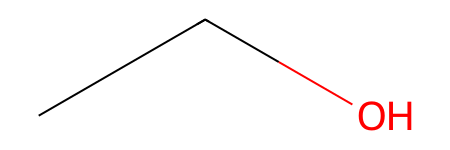

In [2]:
ethanol

NameError: name 'butane' is not defined

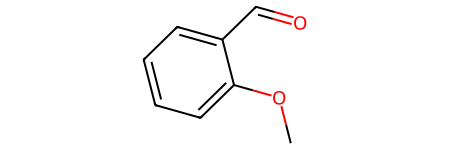

In [9]:
butanol = "CCCCO"
tertbutanol = "CCCCOCCCCOCCCCOCCCCO"
vanillin = "COc1ccccc1C=O"


Chem.MolFromSmiles(vanillin)

In [29]:
smiles_list = ["CC(=O)OC1=CC=CC=C1C(=O)O", "c1c(OC(=O)C)c(C(=O)O)ccc1", "CC(=O)Oc1ccccc1C(=O)O"] 

i=0
list_formula = []
while i < len(smiles_list):
    smiles_num = smiles_list[i]
    Formula = Chem.MolFromSmiles(smiles_num)
    list_formula.append(Formula)
    i=i+1
print(list_formula)
list_smiles = []
i=0
while i < len(list_formula):
    formula_num = list_formula[i]
    Smiles = Chem.MolToSmiles(formula_num)
    list_smiles.append(Smiles)
    i=i+1

print(list_smiles)

#it gives alwayws the same result

[<rdkit.Chem.rdchem.Mol object at 0x000001812D188C80>, <rdkit.Chem.rdchem.Mol object at 0x000001812D188E40>, <rdkit.Chem.rdchem.Mol object at 0x000001812D188F90>]
['CC(=O)Oc1ccccc1C(=O)O', 'CC(=O)Oc1ccccc1C(=O)O', 'CC(=O)Oc1ccccc1C(=O)O']


In [30]:
invalid_smiles = "c1ccccc" 
mol = Chem.MolFromSmiles(invalid_smiles)
print(mol)

None


[12:38:28] SMILES Parse Error: unclosed ring for input: 'c1ccccc'


In [31]:
chemically_invalid = "C(C)(C)(C)(C)(C)"
mol = Chem.MolFromSmiles(chemically_invalid)
print(mol)

None


[12:38:46] Explicit valence for atom # 0 C, 5, is greater than permitted


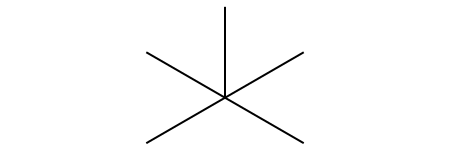

In [32]:
chemically_invalid = "C(C)(C)(C)(C)(C)"
mol = Chem.MolFromSmiles(chemically_invalid, sanitize = False)
print(mol)
mol

In [37]:
def canonicalize_smiles(smiles: str) -> str:
    if not isinstance(smiles, str):
        raise TypeError(f"Invalid type {type(smiles)}: smiles must be a string")
    
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        raise ValueError(f"Could not convert smiles to mol")

    return Chem.MolToSmiles(mol)

In [38]:
canonicalize_smiles("123")
canonicalize_smiles("CO(C)(C)(C)")
canonicalize_smiles("OCC")

[16:26:58] SMILES Parse Error: syntax error while parsing: 123
[16:26:58] SMILES Parse Error: Failed parsing SMILES '123' for input: '123'


ValueError: Could not convert smiles to mol

InChI:  InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)
InChI Key:  BSYNRYMUTXBXSQ-UHFFFAOYSA-N


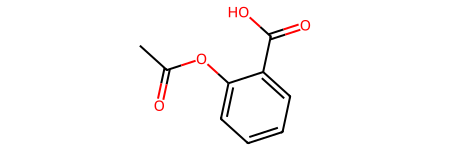

In [39]:
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
aspirin = Chem.MolFromSmiles(aspirin_smiles)
print("InChI: ", Chem.MolToInchi(aspirin))
print("InChI Key: ", Chem.InchiToInchiKey(Chem.MolToInchi(aspirin)))

aspirin_inchi = "InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)"
aspirin = Chem.MolFromInchi(aspirin_inchi)
aspirin

In [40]:
aspirin_2d = Chem.MolToMolBlock(aspirin)
print("SDF format: ", aspirin_2d)

SDF format:  
     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  6  1  0

In [42]:
from rdkit.Chem import AllChem

aspirin_3d = Chem.AddHs(aspirin)
AllChem.EmbedMolecule(aspirin_3d)
print(Chem.MolToMolBlock(aspirin_3d))


     RDKit          3D

 21 21  0  0  0  0  0  0  0  0999 V2000
    3.3498    1.2886    0.2390 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3584   -1.8640   -0.4463 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2116   -2.5895   -0.1812 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2842   -0.4993   -0.3191 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0519   -1.9490    0.1939 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1336    0.5522   -0.2016 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1016    0.1240    0.0612 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0479   -0.6034    0.3269 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0650    1.5736    0.1845 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8662    0.2994   -1.3866 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0102    2.1625    0.5263 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2033    2.3235   -0.0762 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1899    0.0847    0.7008 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.1957    1.0971   -0

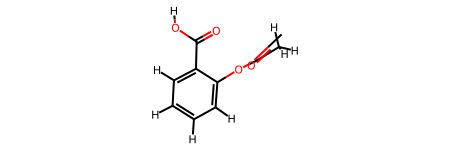

In [43]:
aspirin_3d

In [44]:
with open("aspirin.mol", "w") as file:
    file.write(Chem.MolToMolBlock(aspirin_3d))

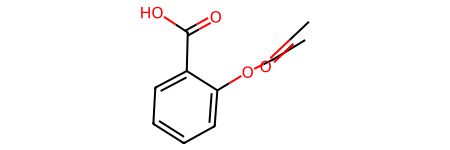

In [45]:
Chem.MolFromMolFile("aspirin.mol")

In [46]:
with open("aspirin.mol", "r") as file:
     mol_block = file.read()
     aspirin_mol = Chem.MolFromMolBlock(mol_block)

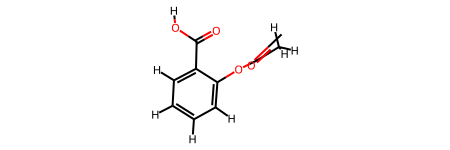

In [47]:
Chem.MolFromMolFile("aspirin.mol", removeHs = False)

In [49]:
import py3Dmol

def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId)
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

drawit(aspirin_3d)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
tylenol_smiles = "CC(=O)NC1=CC=C(C=C1)O"
tylenol = Chem.MolFromSmiles(tylenol_smiles)

In [51]:
print("Number of atoms: ", tylenol.GetNumAtoms())
print("Number of bonds: ", tylenol.GetNumBonds())
#only heavy atoms, not the H in the count

Number of atoms:  11
Number of bonds:  11


In [52]:

print(tylenol.GetAtoms())
print(tylenol.GetBonds())

In [53]:
for atom in tylenol.GetAtoms():
    print(f"Atom: {atom.GetSymbol()}")
    print(f"Atomic number: {atom.GetAtomicNum()}")
    print(f"Degree (Number of neighbors): {atom.GetDegree()}")
    print(f"Valence: {atom.GetTotalValence()}")
    print(f"Hybridization: {atom.GetHybridization()}")
    print("_______________________________________")

Atom: C
Atomic number: 6
Degree (Number of neighbors): 1
Valence: 4
Hybridization: SP3
_______________________________________
Atom: C
Atomic number: 6
Degree (Number of neighbors): 3
Valence: 4
Hybridization: SP2
_______________________________________
Atom: O
Atomic number: 8
Degree (Number of neighbors): 1
Valence: 2
Hybridization: SP2
_______________________________________
Atom: N
Atomic number: 7
Degree (Number of neighbors): 2
Valence: 3
Hybridization: SP2
_______________________________________
Atom: C
Atomic number: 6
Degree (Number of neighbors): 3
Valence: 4
Hybridization: SP2
_______________________________________
Atom: C
Atomic number: 6
Degree (Number of neighbors): 2
Valence: 4
Hybridization: SP2
_______________________________________
Atom: C
Atomic number: 6
Degree (Number of neighbors): 2
Valence: 4
Hybridization: SP2
_______________________________________
Atom: C
Atomic number: 6
Degree (Number of neighbors): 3
Valence: 4
Hybridization: SP2
________________________

In [56]:
tylenol.GetBonds()

for bond in tylenol.GetBonds():
    print(f"Bond: {bond.GetBondTypeAsDouble}")
    print(f"Bond Index: {bond.GetIdx}")
    print(f"Atom 1:{bond.GetBeginAtomIdx()}")
    print(f"Atom 1:{bond.GetEndAtomIdx()}")
    print(f"Is conjugated:{bond.GetIsConjugated()}")
    print(f"Is Aromatic:{bond.GetIsAromatic()}")
    print("______________________________")

Bond: <bound method GetBondTypeAsDouble of <rdkit.Chem.rdchem.Bond object at 0x000001812D202A40>>
Bond Index: <bound method GetIdx of <rdkit.Chem.rdchem.Bond object at 0x000001812D202A40>>
Atom 1:0
Atom 1:1
Is conjugated:False
Is Aromatic:False
______________________________
Bond: <bound method GetBondTypeAsDouble of <rdkit.Chem.rdchem.Bond object at 0x000001812D2023B0>>
Bond Index: <bound method GetIdx of <rdkit.Chem.rdchem.Bond object at 0x000001812D2023B0>>
Atom 1:1
Atom 1:2
Is conjugated:True
Is Aromatic:False
______________________________
Bond: <bound method GetBondTypeAsDouble of <rdkit.Chem.rdchem.Bond object at 0x000001812D202A40>>
Bond Index: <bound method GetIdx of <rdkit.Chem.rdchem.Bond object at 0x000001812D202A40>>
Atom 1:1
Atom 1:3
Is conjugated:True
Is Aromatic:False
______________________________
Bond: <bound method GetBondTypeAsDouble of <rdkit.Chem.rdchem.Bond object at 0x000001812D2023B0>>
Bond Index: <bound method GetIdx of <rdkit.Chem.rdchem.Bond object at 0x0000

In [57]:
N = tylenol.GetAtomWithIdx(3)
print(f"Atom: {N.GetSymbol()}")

for neighbor in N.GetNeighbors():
    print(f"Neighbor: {neighbor.GetIdx()} {neighbor.GetSymbol()}")

Atom: N
Neighbor: 1 C
Neighbor: 4 C


In [58]:
print("C-N bond order: ", tylenol.GetBondBetweenAtoms(3, 4).GetBondType())

C-N bond order:  SINGLE


In [59]:
print("Begin atom index: ", tylenol.GetBondWithIdx(3).GetBeginAtomIdx())
print("End atom index: ", tylenol.GetBondWithIdx(3).GetEndAtomIdx())
print("C-N bond order: ", tylenol.GetBondWithIdx(3).GetBondType())

Begin atom index:  3
End atom index:  4
C-N bond order:  SINGLE


In [3]:
clavulanic_acid_smiles = "O=C2N1[C@H](C(/O[C@@H]1C2)=C/CO)C(=O)O"
clavulanic_acid = Chem.MolFromSmiles(clavulanic_acid_smiles)

# Get the atoms, get the index of the atom with the symbol "N"
for atom in clavulanic_acid.GetAtoms():
    if atom.GetSymbol() == "N": 
        n_idx = atom.GetIdx()

N = clavulanic_acid.GetAtomWithIdx(n_idx)

print(f"Atom: {N.GetSymbol()}, Index: {N.GetIdx()},  Hybridization: {N.GetHybridization()}, Degree: {N.GetDegree()}")

# Get the neighbors 
for neighbor in N.GetNeighbors():
    print(f"Neighbor: {neighbor.GetIdx()} {neighbor.GetSymbol()}")
    print(f"Bond: {clavulanic_acid.GetBondBetweenAtoms(N.GetIdx(), neighbor.GetIdx()).GetBondType()}")

Atom: N, Index: 2,  Hybridization: SP2, Degree: 3
Neighbor: 1 C
Bond: SINGLE
Neighbor: 3 C
Bond: SINGLE
Neighbor: 6 C
Bond: SINGLE


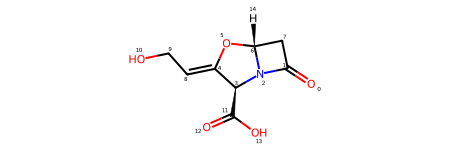

In [4]:
IPythonConsole.drawOptions.addAtomIndices = True
clavulanic_acid

In [8]:
import pandas as pd

path = r"C:\Users\alyss\ppchem\chembl_drugs.csv"
drugs = pd.read_csv(path, sep= ";")

print("Shape", drugs.shape)
print("Columns", drugs.columns)

Shape (14805, 29)
Columns Index(['Parent Molecule', 'Name', 'Synonyms', 'Research Codes', 'Phase',
       'Drug Applicants', 'USAN Stem', 'USAN Year', 'USAN Definition',
       'USAN Stem - Substem', 'First Approval', 'ATC Codes',
       'Level 4 ATC Codes', 'Level 3 ATC Codes', 'Level 2 ATC Codes',
       'Level 1 ATC Codes', 'Indication Class', 'Patent', 'Drug Type',
       'Passes Rule of Five', 'First In Class', 'Chirality', 'Prodrug', 'Oral',
       'Parenteral', 'Topical', 'Black Box', 'Availability Type', 'Smiles'],
      dtype='object')


In [9]:
approved_drugs = drugs[(drugs["Phase"] == 4) & (drugs["Smiles"].notnull())]

In [10]:
approved_drugs = approved_drugs[~approved_drugs["Smiles"].str.contains("\.")]
approved_drugs.reset_index(inplace = True, drop = True)

In [11]:
from rdkit.Chem import PandasTools

PandasTools.RenderImagesInAllDataFrames(images = True) # needed to render images if you run the cell multiple times

PandasTools.AddMoleculeColumnToFrame(approved_drugs, smilesCol = "Smiles", molCol = "RdkitMOL")

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to patch pandas - unable to change molecule rendering
Failed to patch pandas - unable to change molecule rendering


In [12]:

approved_drugs.head(2)

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,RdkitMOL
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,0,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,<rdkit.Chem.rdchem.Mol object at 0x00000169E8F...
1,CHEMBL307145,PYROGALLOL,NSC-5035|PYROGALLIC ACID|PYROGALLOL,NSC-5035,4.0,NaN,NaN,NaN,NaN,NaN,...,0,Achiral Molecule,0,0,0,0,0,Unknown,Oc1cccc(O)c1O,<rdkit.Chem.rdchem.Mol object at 0x00000169E8F...


In [13]:
approved_drugs["My_Mol"] = approved_drugs["Smiles"].apply(Chem.MolFromSmiles)
approved_drugs.head(2)

,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,RdkitMOL,My_Mol
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,<rdkit.Chem.rdchem.Mol object at 0x00000169E8F...,<rdkit.Chem.rdchem.Mol object at 0x00000169E96...
1,CHEMBL307145,PYROGALLOL,NSC-5035|PYROGALLIC ACID|PYROGALLOL,NSC-5035,4.0,NaN,NaN,NaN,NaN,NaN,...,Achiral Molecule,0,0,0,0,0,Unknown,Oc1cccc(O)c1O,<rdkit.Chem.rdchem.Mol object at 0x00000169E8F...,<rdkit.Chem.rdchem.Mol object at 0x00000169E96...


Number of atoms:  23


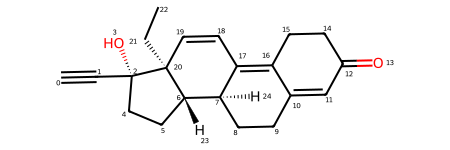

In [14]:
print("Number of atoms: ", approved_drugs["My_Mol"].iloc[0].GetNumAtoms())
approved_drugs["My_Mol"].iloc[0]

In [15]:
# Use stored Mol objects 
approved_drugs["n_atoms"] = approved_drugs["My_Mol"].apply(lambda x: x.GetNumAtoms())

# Use smiles directly, wihtout storing Mol Objects
approved_drugs["n_atoms_from_smiles"] = approved_drugs["Smiles"].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())

In [16]:
from rdkit.Chem import Descriptors
approved_drugs["NumRotatableBonds"] = approved_drugs["Smiles"].apply(lambda x: Descriptors.NumRotatableBonds(Chem.MolFromSmiles(x)))
approved_drugs["NumHDonors"] = approved_drugs["Smiles"].apply(lambda x: Descriptors.NumHDonors(Chem.MolFromSmiles(x)))
approved_drugs["NumHAcceptors"] = approved_drugs["Smiles"].apply(lambda x: Descriptors.NumHAcceptors(Chem.MolFromSmiles(x)))    
approved_drugs["MolWt"] = approved_drugs["Smiles"].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
approved_drugs["MolLogP"] = approved_drugs["Smiles"].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
approved_drugs["NumValenceElectrons"] = approved_drugs["Smiles"].apply(lambda x: Descriptors.NumValenceElectrons(Chem.MolFromSmiles(x)))

In [17]:
from mordred import Calculator, AtomCount

# Only calculate AtomCount descriptors
calc = Calculator(AtomCount, ignore_3D = True)

# Apply the calculator to the molecules 
mordred_df = calc.pandas(approved_drugs["My_Mol"])

# Only extract the number of halogens 
approved_drugs = pd.concat([approved_drugs, mordred_df[["nF", "nBr", "nCl", "nI"]]], axis = 1)

# Add the total number of halogens
approved_drugs["nX"] = approved_drugs[["nF", "nBr", "nCl", "nI"]].sum(axis = 1)

Text(0.5, 1.0, 'Distribution of Halogens in Approved Drugs')

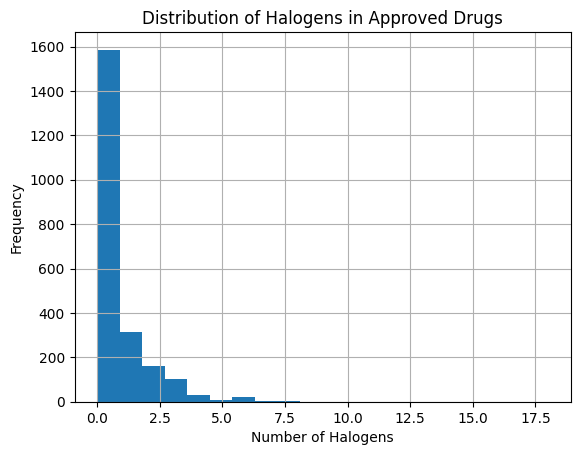

In [18]:
import matplotlib.pyplot as plt
approved_drugs.nX.hist(bins = 20)
plt.xlabel("Number of Halogens")
plt.ylabel("Frequency")
plt.title("Distribution of Halogens in Approved Drugs")

In [31]:
from rdkit.Chem import Draw
approved_drugs.sort_values("nX", ascending = False).head(10)
top_10_mols = top_10["My_Mol"].tolist()
top_10_names = top_10["Name"].tolist()
counts = top_10["nX"].tolist()

labels = [f"{name} - {count}" for name, count in zip(top_10_names, counts)]

Draw.MolsToGridImage(top_10_mols, molsPerRow=5, subImgSize=(300, 300), legends=labels)

TypeError: list indices must be integers or slices, not str

In [20]:
from rdkit.Chem import rdFingerprintGenerator
import numpy as np

mfp = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize = 2048)

approved_drugs["MorganFP"] = approved_drugs["My_Mol"].apply(lambda x: mfp.GetFingerprint(x))

In [25]:
# Get tylenol's fingerprint
tylenol_fp = mfp.GetFingerprint(tylenol)

# Calculate the similarity to tylenol
approved_drugs["similarity_to_tylenol"] = approved_drugs["MorganFP"].apply(lambda x: Chem.DataStructs.TanimotoSimilarity(x, tylenol_fp))

approved_drugs.sort_values("similarity_to_tylenol", ascending = False).head(5)[["Name", "My_Mol", "similarity_to_tylenol"]]

,Name,My_Mol,similarity_to_tylenol
865,ACETAMINOPHEN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,1.000000
512,PHENACETIN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.533333
278,BENORILATE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.410256
1314,PRACTOLOL,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.400000
269,HYDROQUINONE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.400000


In [26]:
tylenol = Chem.MolFromSmiles(tylenol_smiles)
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize = 2048)
approved_drugs["RDKitFP"] = approved_drugs["My_Mol"].apply(lambda x: rdkgen.GetFingerprint(x))

# Get tylenol's fingerprint
tylenol_fp_rdk = rdkgen.GetFingerprint(tylenol)
approved_drugs["similarity_to_tylenol_rdk"] = approved_drugs["RDKitFP"].apply(lambda x: Chem.DataStructs.TanimotoSimilarity(x, tylenol_fp_rdk))
approved_drugs.sort_values("similarity_to_tylenol_rdk", ascending = False).head(5)[["Name", "My_Mol", "similarity_to_tylenol"]]

,Name,My_Mol,similarity_to_tylenol
865,ACETAMINOPHEN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,1.000000
512,PHENACETIN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.533333
789,BUCETIN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.300000
1314,PRACTOLOL,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.400000
1106,VORINOSTAT,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.270270


In [27]:
atom_pairs = rdFingerprintGenerator.GetAtomPairGenerator(fpSize = 2048)
approved_drugs["AtomPairFP"] = approved_drugs["My_Mol"].apply(lambda x: atom_pairs.GetFingerprint(x))

# Get tylenol's fingerprint
tylenol_fp_ap = atom_pairs.GetFingerprint(tylenol)
approved_drugs["similarity_to_tylenol_ap"] = approved_drugs["AtomPairFP"].apply(lambda x: Chem.DataStructs.TanimotoSimilarity(x, tylenol_fp_ap))


approved_drugs.sort_values("similarity_to_tylenol_ap", ascending = False).head(10)[["Name", "My_Mol", "similarity_to_tylenol"]]

,Name,My_Mol,similarity_to_tylenol
865,ACETAMINOPHEN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,1.000000
512,PHENACETIN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.533333
1489,ACETARSONE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.361111
1613,MENADIONE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.138889
1949,METHYL SALICYLATE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.272727
789,BUCETIN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.300000
285,IBUFENAC,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.194444
221,HYDROXYAMPHETAMINE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.281250
169,MEFENAMIC ACID,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.195122
1749,DIAZOXIDE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.111111


In [28]:
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize = 2048)
approved_drugs["TopologicalTorsionFP"] = approved_drugs["My_Mol"].apply(lambda x: ttgen.GetFingerprint(x))

# Get tylenol's fingerprint
tylenol_fp_tt = ttgen.GetFingerprint(tylenol)
approved_drugs["similarity_to_tylenol_tt"] = approved_drugs["TopologicalTorsionFP"].apply(lambda x: Chem.DataStructs.TanimotoSimilarity(x, tylenol_fp_tt))

# Draw the top 10
approved_drugs.sort_values("similarity_to_tylenol_tt", ascending = False).head(5)[["Name", "My_Mol", "similarity_to_tylenol"]]

,Name,My_Mol,similarity_to_tylenol
865,ACETAMINOPHEN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,1.000000
512,PHENACETIN,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.533333
269,HYDROQUINONE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.400000
221,HYDROXYAMPHETAMINE,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.281250
1314,PRACTOLOL,<rdkit.Chem.rdchem.Mol object at 0x00000169EA8...,0.400000


In [29]:
halogens = ["F", "Br", "Cl", "I"]
highlights = []
colors = []
for mol in top_10_mols:
    highlight = []
    color = {}
    for atom in mol.GetAtoms():
        if atom.GetSymbol() in halogens:
            highlight.append(atom.GetIdx())
        if atom.GetSymbol() == "F":
            color[atom.GetIdx()] = (0.8,0,0.8)
        elif atom.GetSymbol() == "Br":
            color[atom.GetIdx()] = (0.8,0.8,0)
        elif atom.GetSymbol() == "Cl":
            color[atom.GetIdx()] = (0,0.8,0.8)
        elif atom.GetSymbol() == "I":
            color[atom.GetIdx()] = (0.8,0,0)


    highlights.append(highlight)
    colors.append(color)



Draw.MolsToGridImage(top_10_mols, molsPerRow=5, subImgSize=(300, 300), highlightAtomLists=highlights, highlightAtomColors = colors, legends=labels)

NameError: name 'top_10_mols' is not defined